## Examining Factors Responsible for Heart Attacks


DESCRIPTION

*Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Healthcare

*Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

*Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

1. Preliminary analysis:

*Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
*Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.
2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

*Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
*Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
*Study the occurrence of CVD across Age.
*Study the composition of overall patients w.r.t. Gender.
*Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
*Describe the relationship between Cholesterol levels and our target variable.
*What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.
*Is thalassemia a major cause of CVD?
*How are the other factors determining the occurrence of CVD?
*Use a pair plot to understand the relationship between all the given variables.
3. Build a baseline model to predict using a Logistic Regression and explore the results.

 Project Task: Week 1

Importing, Understanding, and Inspecting Data :

*Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

*Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

*Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

Performing EDA:

*Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

*Study the occurrence of CVD across different ages.

*Can we detect heart attack based on anomalies in resting blood pressure of the patient?

*Study the composition of overall patients w.r.t . gender.


Project Task: Week 2

*Performing EDA and Modeling:

*Describe the relationship between cholesterol levels and our target variable.

*What can be concluded about the relationship between peak exercising and occurrence of heart attack?

*Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

*Use a pair plot to understand the relationship between all the given variables.

*Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

Dashboarding:

*Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.

*Demonstrate  the variables associated with each other and factors to build a dashboard

### Step1: Import Dataset and Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('Desktop')

In [5]:
data = pd.read_csv('Heart.csv')

### Step2:Preliminary analysis:

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

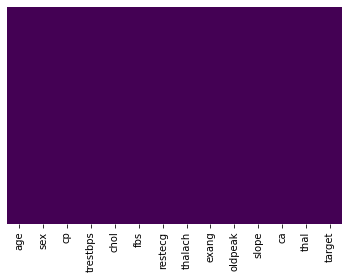

In [14]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

We can see in above graph there are no duplicates in the Dataset

In [15]:
### Duplicate Values Yes or No
duplicate=data[data.duplicated()]

In [16]:
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [18]:
data.duplicated().sum()

1

In [19]:
#Dropping duplicates
data1=data.drop_duplicates()

In [21]:
data1.duplicated().sum()

0

Duplicate rows were removed from the dataset as shown above

### Step 3: Exploratory Data Ananlysis

In [23]:
## Statistical summary of the dataset
data1.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [27]:
list(enumerate(data))

[(0, 'age'),
 (1, 'sex'),
 (2, 'cp'),
 (3, 'trestbps'),
 (4, 'chol'),
 (5, 'fbs'),
 (6, 'restecg'),
 (7, 'thalach'),
 (8, 'exang'),
 (9, 'oldpeak'),
 (10, 'slope'),
 (11, 'ca'),
 (12, 'thal'),
 (13, 'target')]

In [32]:
numeric_data1 = data1.iloc[:,[0,3,4,7,9]]
numeric_data1.head(5)

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [31]:
categorical_data1 = data1.iloc[:,[1,2,5,6,8,10,11,12,13]]
categorical_data1.head(5)

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [33]:
numeric_data1.mean()

age          54.420530
trestbps    131.602649
chol        246.500000
thalach     149.569536
oldpeak       1.043046
dtype: float64

In [34]:
numeric_data1.median()

age          55.5
trestbps    130.0
chol        240.5
thalach     152.5
oldpeak       0.8
dtype: float64

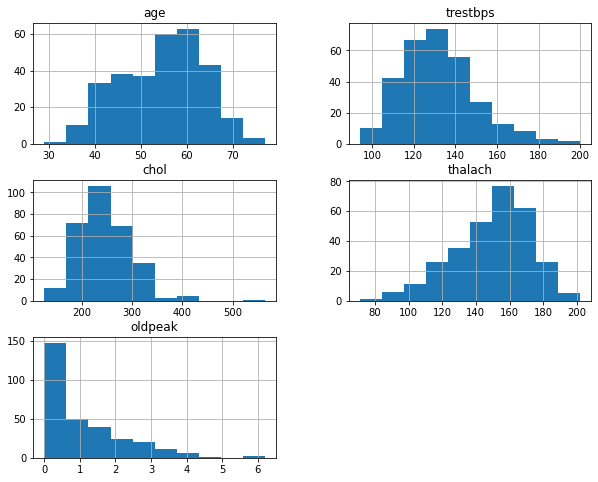

In [37]:
numeric_data.hist(figsize=(10,8))
plt.show()

As shown above we can say that Age group 50 to 65 have high chance of heart problems, trestbps is skewed towards 110 to 140,Chol and oldpeak is skewed towards left and thalach skewed towards right side

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

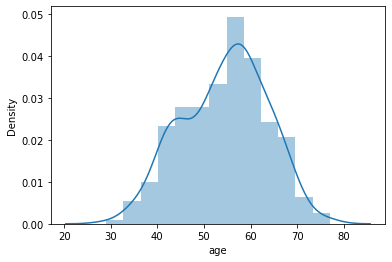

In [39]:
### Study the occurrence of CVD across Age
sns.distplot(data1['age'])

In above chart we can clearly see age group 60 have high chance of heart attack occurance below that age group 65 have high possibilty.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

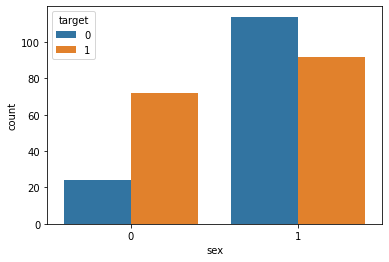

In [44]:
#Study the composition of overall patients w.r.t. Gender.
sns.countplot(data1["sex"],hue=data1["target"])

In above graph we can see that Male patients have high occurance of heart problem than women

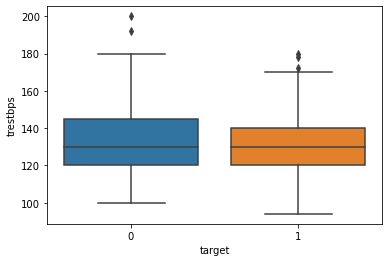

In [45]:
###detect a heart attack based on anomalies in the Resting Blood Pressure of the patient
sns.boxplot(y= "trestbps", x="target", data=data1)
plt.show()


In above plot we can see that heart disease yes and no both have similar blood pressure so we can not predict it from blood pressure

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

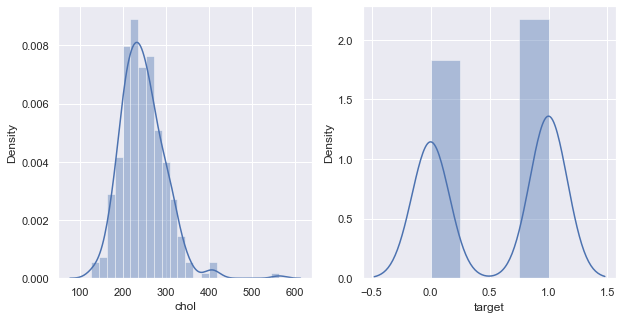

In [48]:
### Describe the relationship between Cholesterol levels and our target variable
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data1['chol'], kde = True)

plt.subplot(1,2,2)
sns.distplot(data1['target'], kde = True)

When we see above charts we can say that colestrol level 230 to 250 have high chance of heart attack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

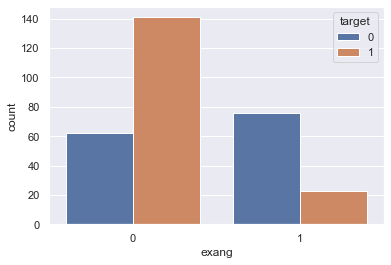

In [49]:
###Relationship between peak exercising and the occurrence of a heart attack
sns.countplot(data1["exang"],hue=data1["target"])

As per above chart we can say that exercise induced angina 1=yes, 0=no. So exercise induced angina is less in this data since 'no' is more

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

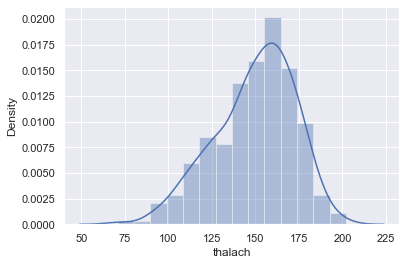

In [55]:
###Is thalassemia a major cause of CVD?
sns.distplot(data1['thalach'])

we can see in above graph Normal blood flow type is more in the given dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='count'>

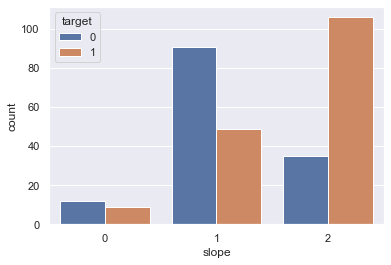

In [57]:
###How are the other factors determining the occurrence of CVD?
sns.countplot(data1["slope"],hue=data1["target"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

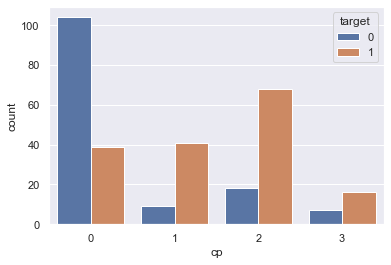

In [58]:
sns.countplot(data1["cp"],hue=data1["target"])

In above graph we can see that chest pain type 2 have high chance of heart disease

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

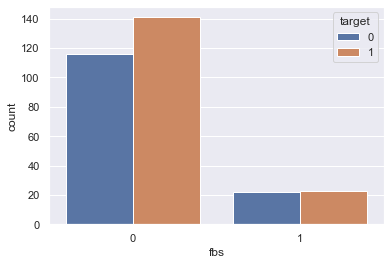

In [59]:
sns.countplot(data1["fbs"],hue=data1["target"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

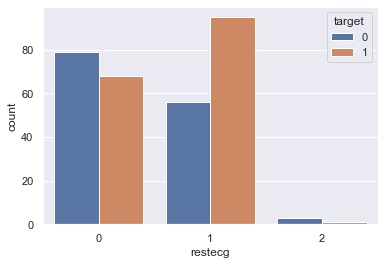

In [60]:
sns.countplot(data1["restecg"],hue=data1["target"])

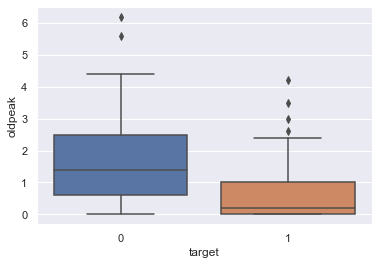

In [61]:
sns.boxplot(y= "oldpeak", x="target", data=data1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

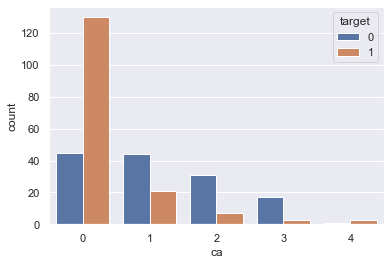

In [62]:
sns.countplot(data1["ca"],hue=data1["target"])

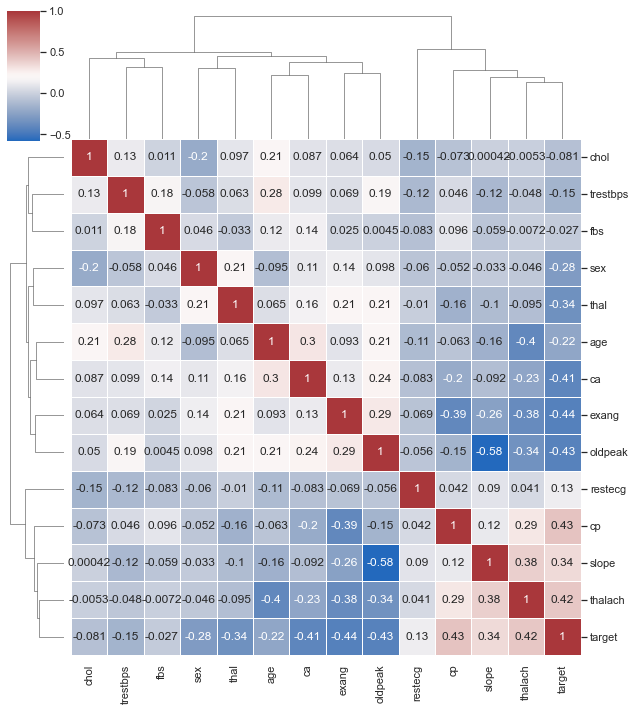

In [64]:
sns.clustermap(data1.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

After looking into above chart we can say that Chest pain type and maximum heart rate are positively correlated to target, and they are the causes of heart attack, there are no major causes as such.

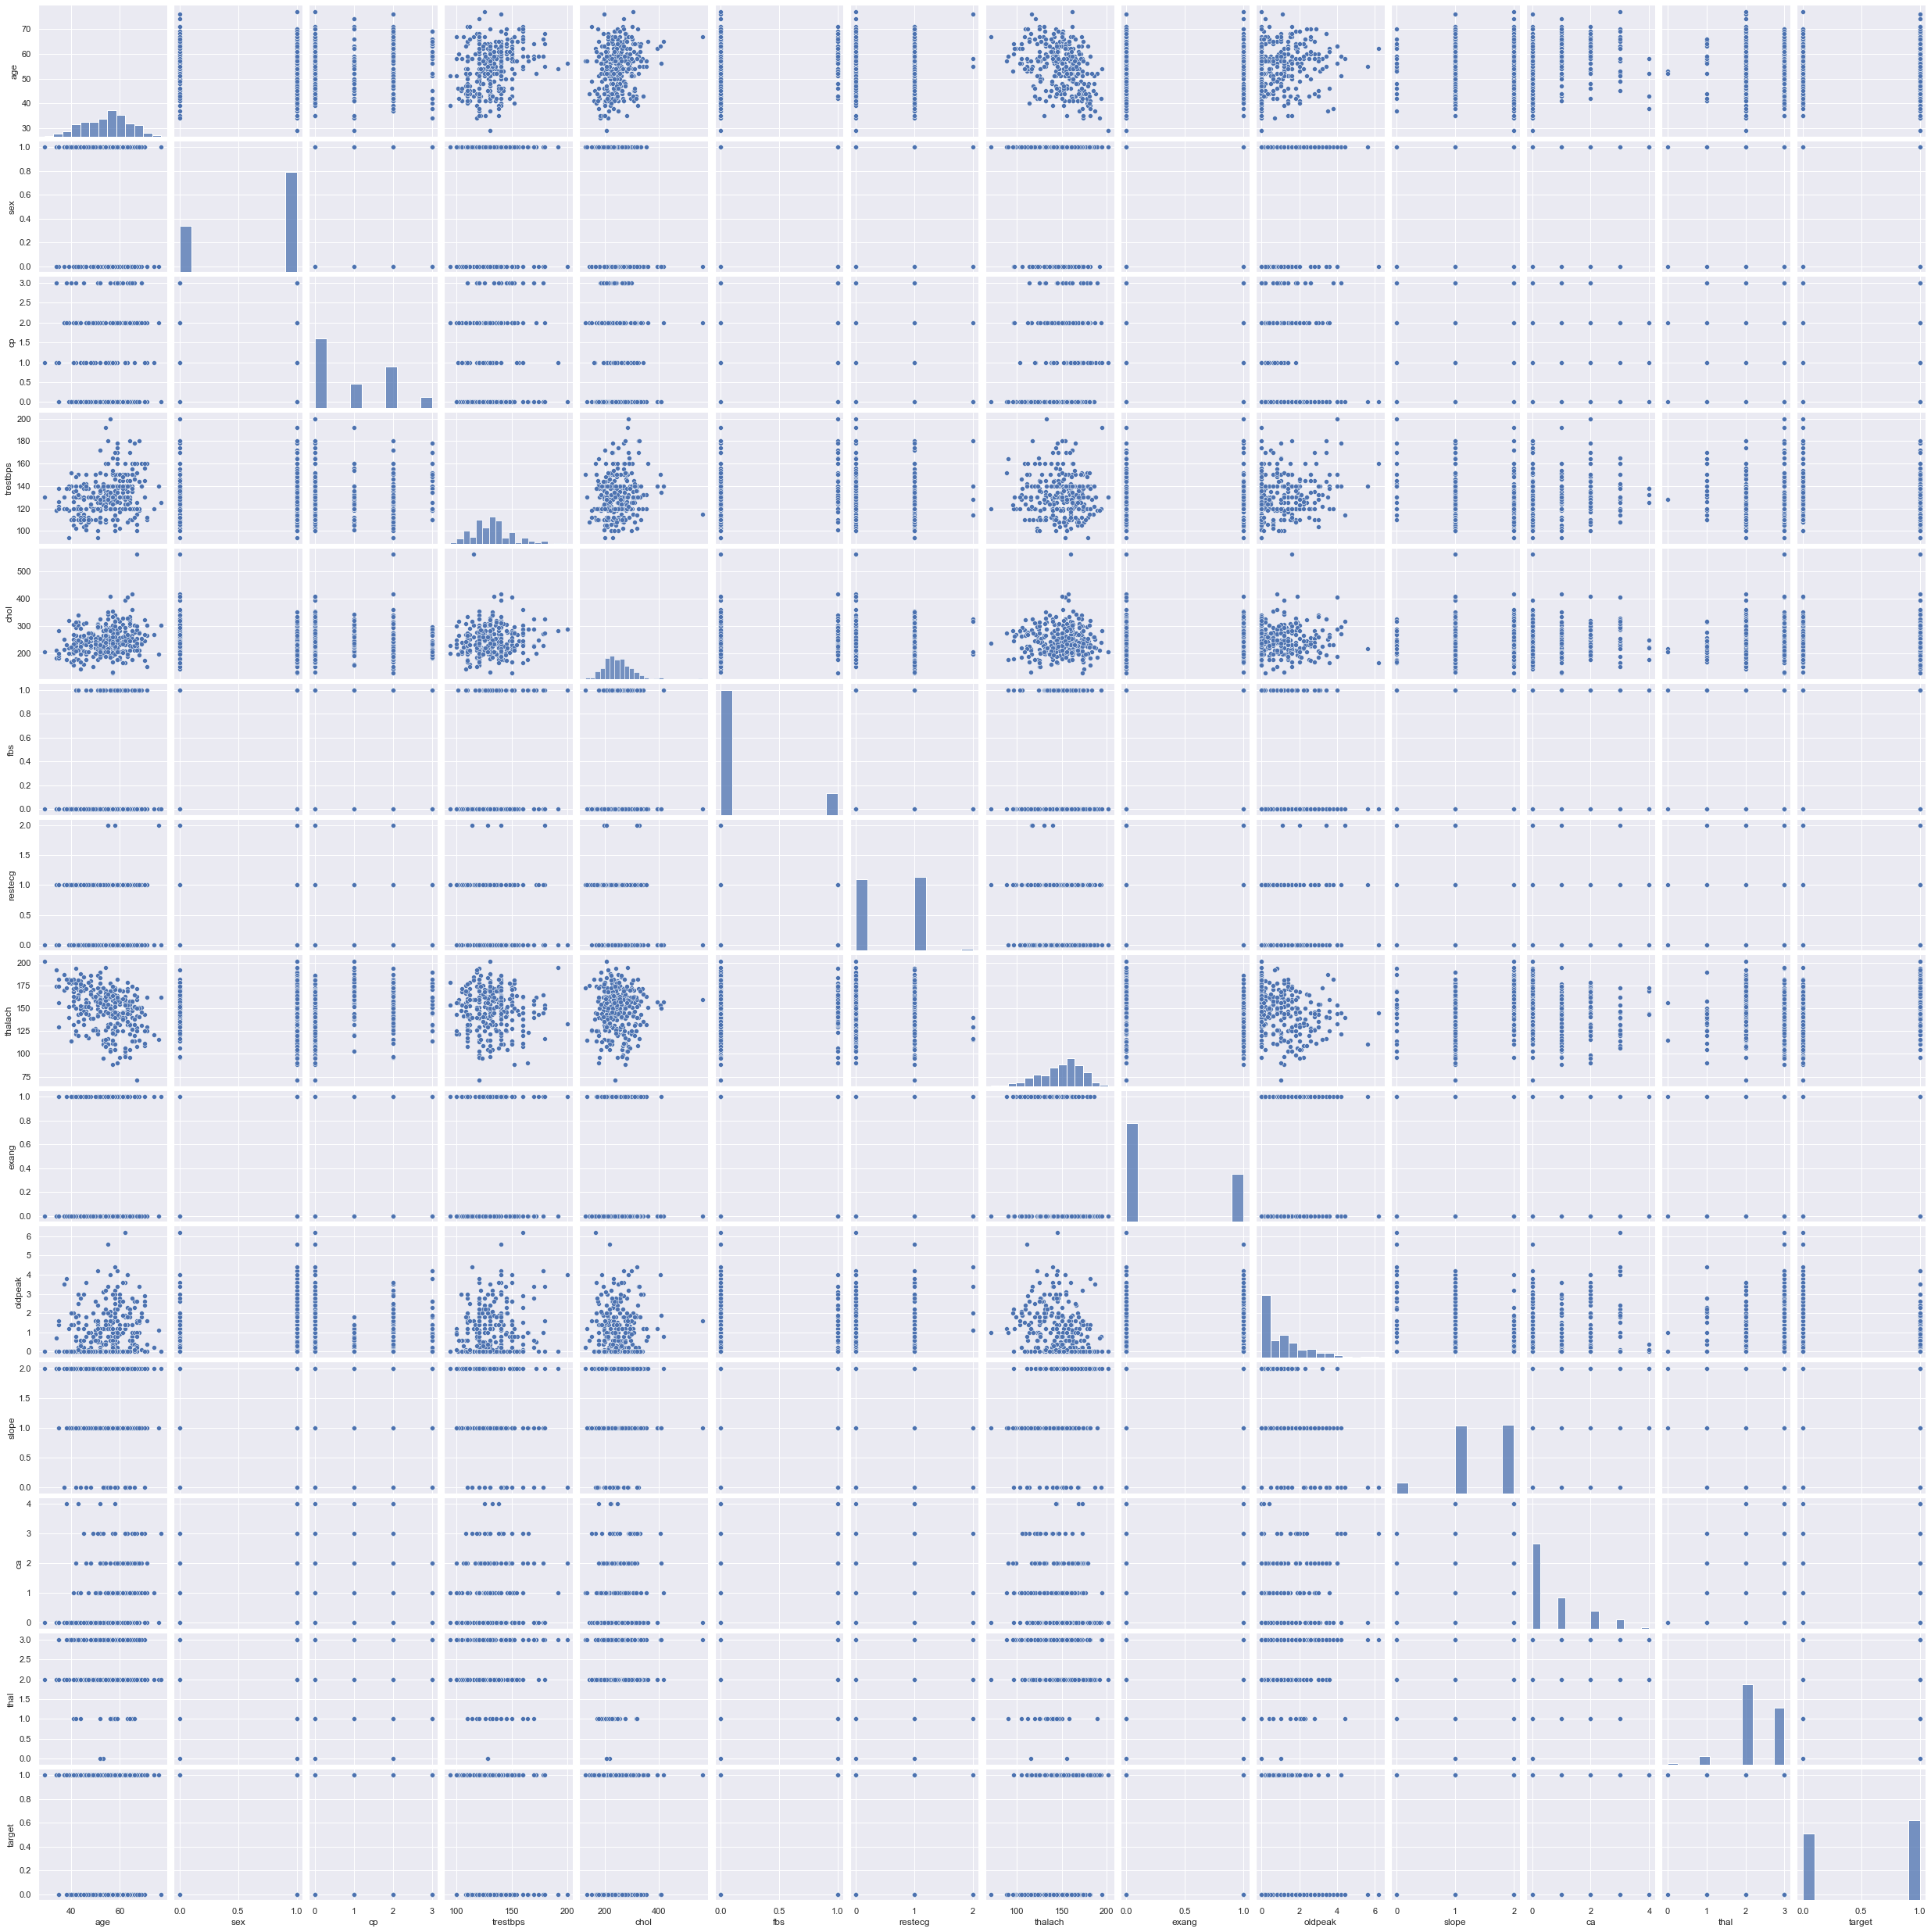

In [63]:
###Use a pair plot to understand the relationship between all the given variables.
sns.pairplot(data1)

### Step 4: Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[30 11]
 [ 7 43]]
0.8021978021978022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that our model predict accuracy score of 80 which is good

In [ ]:
###Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.
https://public.tableau.com/app/profile/dnyaneshwar.gaikwad/viz/ExamingFactorsResponsibleForHeartAttacks/Story1?publish=yes

In [ ]:
###Demonstrate  the variables associated with each other and factors to build a dashboard
https://public.tableau.com/app/profile/dnyaneshwar.gaikwad/viz/Correlation-FactorsaffectingHeartAttack_16731887655910/Correlation?publish=yes